## **Preamble**
Title: Beer Rater

Author: Kyle Weidner

Email: kweidne2@msudenver.edu

Last Update: 12/06/2021

# **Introduction**
This project analyzes a dataset of 5500+ different beers, their characteristics, and their average ratings. The program
then runs Random Forest Regression to predict the rating of a beer based on its characteristics.
The program then attempts to find correlation between rating and beer characteristics such as ABV, Astringency, Body, etc.

# **Dataset**
The dataset for this report was obtained from Kaggle
https://www.kaggle.com/stephenpolozoff/top-beer-information/version/3?select=beer_data_set.csv

This dataset consists of up to 50 top-rated beers across 112 styles, 5558 beers in total
The categories of the dataset are described as follows:

* <b>Name</b><br>
Beer's name

* <b>Key</b><br>
Beer's unique ID

* <b>Style</b><br>
The style of the beer. More information on beer-styles can be found here: https://www.craftbeer.com/beer/beer-styles-guide

* <b>Brewery</b><br>
The name of the beer's source

* <b>Description</b><br>
Notes on the beer (if available)

* <b>ABV</b><br>
Alcohol By Volume

* <b>Astringency</b><br>
Refers to the puckery or drying sensation created in the mouth and throat

* <b>Ave Rating</b><br>
The average rating of the beer at the time of collection

* <b>Min IBU</b><br>
The minimum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was.

* <b>Max IBU</b><br>
The maximum IBU value each beer can possess. IBU was not a value available for each beer, but the IBU range for each style was.

* <b>Body</b><br>
Refers to the weight or thickness of a beer

* <b>Alcohol</b><br>
I cannot find information about this category. I assume it measures the prevalence of the taste of alcohol

* <b>Bitter</b><br>
The bitterness level of the beer's taste

* <b>Sweet</b><br>
The sweetness level of the beer's taste

* <b>Sour</b><br>
The sourness level of the beer's taste

* <b>Salty</b><br>
The saltiness level of the beer's taste

* <b>Fruits</b><br>
The fruitiness level of the beer's taste

* <b>Hoppy</b><br>
The hoppiness level of the beer's taste

* <b>Spices</b><br>
The spices level of the beer's taste

* <b>Malty</b><br>
The maltiness level of the beer's taste

# **Preprocessing**

The values are stored in a pandas dataframe and the beers that have null values in any columns are dropped.
A second dataframe is created, with unnecessary columns omitted, for the use of Random Forest Regression

In [8]:
# CS390Z - Introduction to Data Mining - Fall 2021
# Instructor: Thyago Mota
# Student: Kyle Weidner
# Description: Beer Rater Final Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.cbook import boxplot_stats

# Data Pre-processing & Cleaning
df = pd.read_csv('../data/beer_data_set.csv')
df = df.dropna(how='any', axis=0)  # drops any row with null data
df2 = df.drop(columns=["Name", "Style", "Brewery", "Description"])
df

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, wit...",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is al...",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,Notes:Long Trail Ale is a full-bodied amber al...,5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,Notes:Just cause it's dark and German doesn't ...,5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,Red Nose Winter Ale,696,Winter Warmer,17,Natty Greene's Pub & Brewing Co.,Notes:,6.8,3.59,35,50,...,44,24,19,52,21,0,26,21,96,77
5554,Our Special Ale 2019 (Anchor Christmas Ale),697,Winter Warmer,17,Anchor Brewing Company,Notes:This is the forty-fifth annual Our Speci...,6.9,3.79,35,50,...,73,9,58,87,23,0,48,91,44,104
5555,Fish Tale Winterfish,698,Winter Warmer,17,Fish Brewing Company / Fishbowl Brewpub,Notes:,7.5,3.76,35,50,...,36,50,70,72,59,0,81,110,18,73
5556,"He'Brew Hanukkah, Chanukah: Pass The Beer",699,Winter Warmer,17,Shmaltz Brewing Company,Notes:Chanukah Beer pours a rich crystal clear...,8.0,3.61,35,50,...,64,30,57,78,15,1,28,57,23,129


# **Summary Statistics**
A summary of the various beer characteristic statistics.

In [9]:
df.describe()

,key,Style Key,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
count,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000,5556.000000
mean,2779.437725,64.447444,6.634948,3.760481,20.719762,38.461663,15.941505,42.752880,15.978402,34.322174,53.630490,34.619330,1.314435,39.386609,38.421166,17.588553,68.599172
std,1604.852085,35.820549,2.521077,0.442848,13.736485,22.181782,11.625370,28.592263,18.270748,27.121062,35.867233,39.854361,3.874765,36.655173,31.916471,23.976975,44.604752
min,1.000000,2.000000,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1389.750000,34.000000,5.000000,3.590000,10.000000,25.000000,8.000000,25.000000,5.000000,13.000000,27.000000,9.000000,0.000000,10.000000,14.000000,4.000000,33.000000
50%,2779.500000,64.000000,6.000000,3.820000,20.000000,35.000000,14.000000,38.000000,10.000000,29.000000,49.500000,21.000000,0.000000,28.000000,30.000000,9.000000,65.000000
75%,4169.250000,95.000000,7.900000,4.040000,25.000000,45.000000,22.000000,55.000000,20.000000,51.000000,74.000000,44.000000,1.000000,62.000000,56.000000,22.000000,99.000000
max,5558.000000,126.000000,57.500000,4.830000,65.000000,100.000000,83.000000,197.000000,139.000000,150.000000,263.000000,323.000000,66.000000,222.000000,193.000000,184.000000,304.000000


# **Data Visualization**
A histogram visualization to represent each of the beer's characteristics.

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

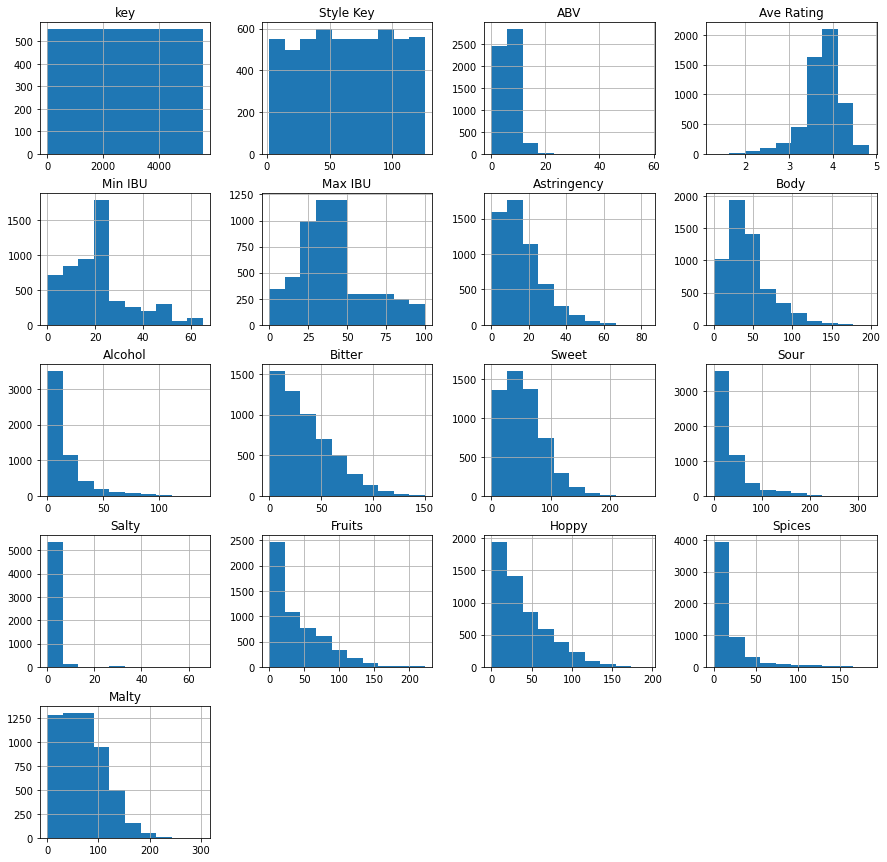

In [10]:
# Data Visualization
df.hist(figsize=(15, 15))

# **Outlier Analysis**
Each beer characteristic is analyzed and displayed in a boxplot. Each boxplot's outliers are listed with information
about the specific beer.

In [11]:
# # OUTLIER ANALYSIS VIA BOXPLOT
ave_rating_outliers = []
abv_outliers = []
min_ibu_outliers = []
max_ibu_outliers = []
astringency_outliers = []
body_outliers = []
alcohol_outliers = []
bitter_outliers = []
sweet_outliers = []
sour_outliers = []
salty_outliers = []
fruits_outliers = []
hoppy_outliers = []
spices_outliers = []
malty_outliers = []

## Average Rating Outlier Analysis


'Foster's Premium Ale' from Foster's Group Limited - Avg Rating: 2.88
'Foster's Special Bitter' from Foster's Group Limited - Avg Rating: 2.85
'Kasteel Cru Rose' from Brasserie Licorne - Avg Rating: 2.7
'Ferme Framboos' from Brouwerij De Vlier - Avg Rating: 2.87
'Drone Witch' from Heirloom Rustic Ales - Avg Rating: 4.74
' India Pale Ale' from Alexander Keith's - Avg Rating: 2.62
'eisbock' from Kulmbacher Kommunbräu - Avg Rating: 4.83
'Holsten Maibock' from Holsten-Brauerei - Avg Rating: 2.87
'Michelob AmberBock' from Anheuser-Busch - Avg Rating: 2.9
'Ghost Scorpion Lager' from Elevator Brewery & Draught Haus - Avg Rating: 2.65
'El Lapino' from Microbrasserie du Lièvre - Avg Rating: 1.63
'Sleeman Cream Ale (64*)' from Sleeman Breweries Ltd. - Avg Rating: 2.86
'Henry Weinhard's Blue Boar Ale' from Blitz-Weinhard Brewing Co. - Avg Rating: 2.83
'Samuel Adams Cranberry LambicBoston Beer Company (Samuel Adams)' from Boston Beer Company (Samuel Adams) - Avg Rating: 2.68
'Redd's Apple Ale' fro

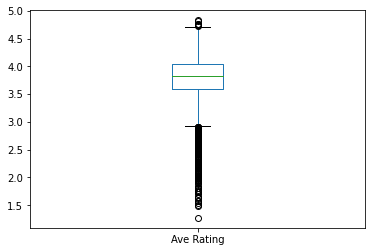

In [12]:
# Average Rating
df2.boxplot(column=["Ave Rating"], grid=False)
stats = boxplot_stats(df2["Ave Rating"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Ave Rating"] > whisker_max:
        ave_rating_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Avg Rating: " + str(row["Ave Rating"]))
    if row["Ave Rating"] < whisker_min:
        ave_rating_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Avg Rating: " + str(row["Ave Rating"]))
for beer in ave_rating_outliers:
    print(beer)
plt.show()

## ABV Outlier Analysis

'Olde School Barleywine' from Dogfish Head Craft Brewery - ABV: 15.0
'Brewer's Reserve Bourbon Barrel Barleywine' from Central Waters Brewing Co. - ABV: 14.3
'A Deal With The Devil' from Anchorage Brewing Company - ABV: 17.3
'Helldorado' from Firestone Walker Brewing Co. - ABV: 12.8
'Great' from Alpine Beer Company - ABV: 14.0
'Barrel Aged Behemoth' from 3 Floyds Brewing Co. - ABV: 12.5
'Old Ruffian - Barrel-Aged' from Great Divide Brewing Company - ABV: 12.7
'Barrel Roll No. 4 Wing Over' from Hangar 24 Brewing - ABV: 13.8
'Hell On Wood' from DuClaw Brewing Company - ABV: 13.1
'Bourbon County Brand Barleywine Ale' from Goose Island Beer Co. - ABV: 14.4
'§ucaba' from Firestone Walker Brewing Co. - ABV: 12.5
'Insanity' from Weyerbacher Brewing Co. - ABV: 13.3
'Mother Of All Storms' from Pelican Pub & Brewery - ABV: 14.0
'Arctic Devil Barley Wine' from Midnight Sun Brewing Co. - ABV: 13.2
'Straight Jacket' from Revolution Brewing - ABV: 15.0
'Bourbon Barrel-Aged Barley Wine' from Kuhnhenn

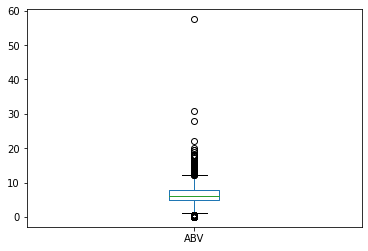

In [13]:
# ABV
df2.boxplot(column=["ABV"], grid=False)
stats = boxplot_stats(df2["ABV"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["ABV"] > whisker_max:
        abv_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - ABV: " + str(row["ABV"]))
    if row["ABV"] < whisker_min:
        abv_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - ABV: " + str(row["ABV"]))
for beer in abv_outliers:
    print(beer)
plt.show()

## Min IBU Outlier Analysis

'Bigfoot' from Sierra Nevada Brewing Co. - Min IBU: 60
'Third Coast Old Ale' from Bell's Brewery - Eccentric Café & General Store - Min IBU: 60
'Olde School Barleywine' from Dogfish Head Craft Brewery - Min IBU: 60
'Brewer's Reserve Bourbon Barrel Barleywine' from Central Waters Brewing Co. - Min IBU: 60
'Old Ruffian' from Great Divide Brewing Company - Min IBU: 60
'Old Horizontal' from Victory Brewing Company - Downingtown - Min IBU: 60
'Behemoth' from 3 Floyds Brewing Co. - Min IBU: 60
'Olde GnarlyWine' from Lagunitas Brewing Company - Min IBU: 60
'Old Numbskull' from AleSmith Brewing Company - Min IBU: 60
'Flying Mouflan' from Tröegs Brewing Company - Min IBU: 60
'Bigfoot - Barrel-Aged' from Sierra Nevada Brewing Co. - Min IBU: 60
'XS Old Crustacean' from Rogue Ales - Min IBU: 60
'Doggie Claws' from Hair Of The Dog Brewing Company / Brewery And Tasting Room - Min IBU: 60
'A Deal With The Devil' from Anchorage Brewing Company - Min IBU: 60
'Helldorado' from Firestone Walker Brewing C

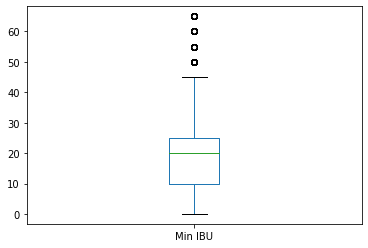

In [14]:
# Min IBU
df2.boxplot(column=["Min IBU"], grid=False)
stats = boxplot_stats(df2["Min IBU"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Min IBU"] > whisker_max:
        min_ibu_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Min IBU: " + str(row["Min IBU"]))
    if row["ABV"] < whisker_min:
        min_ibu_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Min IBU: " + str(row["Min IBU"]))
for beer in min_ibu_outliers:
    print(beer)
plt.show()

## Max IBU Outlier Analysis

'Bigfoot' from Sierra Nevada Brewing Co. - Max IBU: 100
'Third Coast Old Ale' from Bell's Brewery - Eccentric Café & General Store - Max IBU: 100
'Olde School Barleywine' from Dogfish Head Craft Brewery - Max IBU: 100
'Brewer's Reserve Bourbon Barrel Barleywine' from Central Waters Brewing Co. - Max IBU: 100
'Old Ruffian' from Great Divide Brewing Company - Max IBU: 100
'Old Horizontal' from Victory Brewing Company - Downingtown - Max IBU: 100
'Behemoth' from 3 Floyds Brewing Co. - Max IBU: 100
'Olde GnarlyWine' from Lagunitas Brewing Company - Max IBU: 100
'Old Numbskull' from AleSmith Brewing Company - Max IBU: 100
'Flying Mouflan' from Tröegs Brewing Company - Max IBU: 100
'Bigfoot - Barrel-Aged' from Sierra Nevada Brewing Co. - Max IBU: 100
'XS Old Crustacean' from Rogue Ales - Max IBU: 100
'Doggie Claws' from Hair Of The Dog Brewing Company / Brewery And Tasting Room - Max IBU: 100
'A Deal With The Devil' from Anchorage Brewing Company - Max IBU: 100
'Helldorado' from Firestone Wa

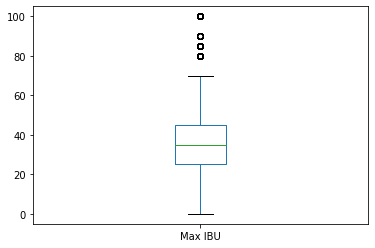

In [15]:
# Max IBU
df2.boxplot(column=["Max IBU"], grid=False)
stats = boxplot_stats(df2["Max IBU"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Max IBU"] > whisker_max:
        max_ibu_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Max IBU: " + str(row["Max IBU"]))
    if row["Max IBU"] < whisker_min:
        max_ibu_outliers.append("'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Max IBU: " + str(row["Max IBU"]))
for beer in max_ibu_outliers:
    print(beer)
plt.show()

## Astringency Outlier Analysis

'Blanc De Blancs' from Side Project Brewing - Astringency: 47
'Two Lights' from Allagash Brewing Company - Astringency: 58
'Citra Blonde Summer Brew' from Widmer Brothers Brewing Company - Astringency: 48
'Blonde' from Redhook Brewlab - Astringency: 45
'Single Fermented Belgian Golden Ale' from Brouwerij Duvel Moortgat NV - Astringency: 45
'Golden Brett' from Allagash Brewing Company - Astringency: 53
'St. Bretta (Spring)' from Crooked Stave Artisan Beer Project - Astringency: 53
'Nightmare On Brett Raspberry' from Crooked Stave Artisan Beer Project - Astringency: 45
'St. Bretta Citrus Saison' from Crooked Stave Artisan Beer Project - Astringency: 53
'Bière De Mars' from Brewery Ommegang - Astringency: 45
'Reposé' from Jester King Brewery - Astringency: 46
'Le Batteur' from Bell's Brewery - Eccentric Café & General Store - Astringency: 57
'Saison-Brett' from Boulevard Brewing Co. - Astringency: 45
'Arthur' from Hill Farmstead Brewery - Astringency: 48
'Anna' from Hill Farmstead Brewery

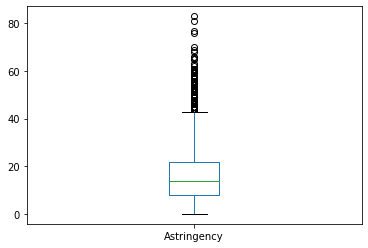

In [16]:
# Astringency
df2.boxplot(column=["Astringency"], grid=False)
stats = boxplot_stats(df2["Astringency"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Astringency"] > whisker_max:
        astringency_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Astringency: " + str(row["Astringency"]))
    if row["Astringency"] < whisker_min:
        astringency_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Astringency: " + str(row["Astringency"]))
for beer in astringency_outliers:
    print(beer)
plt.show()

## Body Outlier Analysis

'Saxonator Dunkles Doppelbock' from Jack's Abby Brewing - Body: 106
'Fireman's Brew Brunette Beer' from Fireman's Brew, Inc. - Body: 119
'Samuel Adams Cherry Chocolate BockBoston Beer Company (Samuel Adams)' from Boston Beer Company (Samuel Adams) - Body: 117
'The Vixen Chocolate Chili BockBoston Beer Company (Samuel Adams)' from Boston Beer Company (Samuel Adams) - Body: 127
'Saranac Chocolate Lager' from Matt Brewing Company / Saranac Brewery - Body: 136
'Block House Double Chocolate Bock' from Pittsburgh Brewing Co. - Body: 107
'Sumatra Mountain Brown' from Founders Brewing Company - Body: 103
'Decadent Dark Chocolate Ale' from Atwater Brewery - Body: 123
'Wexford Irish Cream Ale' from Greene King / Morland Brewery - Body: 103
'Regular Coffee' from Carton Brewing Company - Body: 109
'El Mole Ocho' from New Holland Brewing Company - Body: 106
'Mexican Chocolate Stout' from Copper Kettle Brewing Company - Body: 103
'Mexas Ranger' from Mikkeller ApS - Body: 133
'Señorita' from Elevatio

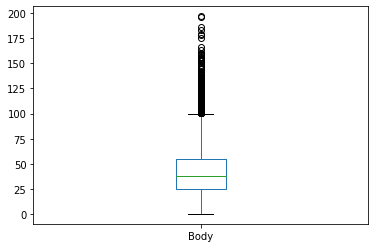

In [17]:
# Body
df2.boxplot(column=["Body"], grid=False)
stats = boxplot_stats(df2["Body"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Body"] > whisker_max:
        body_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Body: " + str(row["Body"]))
    if row["Body"] < whisker_min:
        body_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Body: " + str(row["Body"]))
for beer in body_outliers:
    print(beer)
plt.show()

## Alcohol Outlier Analysis

'Sticke It To The Man' from O'Fallon Brewery - Alcohol: 50
'Olde School Barleywine' from Dogfish Head Craft Brewery - Alcohol: 82
'Brewer's Reserve Bourbon Barrel Barleywine' from Central Waters Brewing Co. - Alcohol: 94
'Old Horizontal' from Victory Brewing Company - Downingtown - Alcohol: 45
'Behemoth' from 3 Floyds Brewing Co. - Alcohol: 52
'Olde GnarlyWine' from Lagunitas Brewing Company - Alcohol: 44
'Bigfoot - Barrel-Aged' from Sierra Nevada Brewing Co. - Alcohol: 74
'Helldorado' from Firestone Walker Brewing Co. - Alcohol: 56
'Cockeyed Cooper' from Uinta Brewing Company - Alcohol: 66
'Solstice D'hiver' from Brasserie Dieu du Ciel! - Alcohol: 61
'Lower De Boom Barleywine' from 21st Amendment Brewery - Alcohol: 47
'Barleywine Ale' from The Duck-Rabbit Craft Brewery - Alcohol: 43
'Smuttynose Barleywine Style Ale (Big Beer Series)' from Smuttynose Brewing Company - Alcohol: 43
'John Barleycorn Barleywine Ale' from Mad River Brewing Company - Alcohol: 61
'Barrel Aged Behemoth' from 3

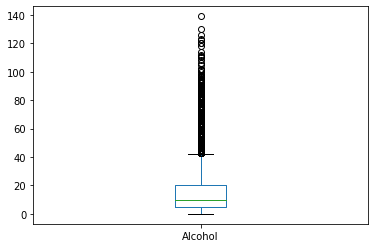

In [18]:
# Alcohol
df2.boxplot(column=["Alcohol"], grid=False)
stats = boxplot_stats(df2["Alcohol"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Alcohol"] > whisker_max:
        alcohol_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Alcohol: " + str(row["Alcohol"]))
    if row["Alcohol"] < whisker_min:
        alcohol_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Alcohol: " + str(row["Alcohol"]))
for beer in alcohol_outliers:
    print(beer)
plt.show()

## Bitter Outlier Analysis

'Day & Night' from Trillium Brewing Company - Bitter: 137
'Beast Bitter' from Middle Ages Brewing Co., Ltd. - Bitter: 112
'XX Bitch Creek' from Grand Teton Brewing Co. - Bitter: 111
'Perkulator Coffee Dopplebock' from Dark Horse Brewing Company - Bitter: 124
'Femme Fatale Noir' from Evil Twin Brewing - Bitter: 127
'Coffee Bender' from Surly Brewing Company - Bitter: 139
'Durty Mud Season' from Smuttynose Brewing Company - Bitter: 122
'Cacao Bender' from Surly Brewing Company - Bitter: 115
'Heritage Coffee Brown Ale' from Alaskan Brewing Co. - Bitter: 111
'Oscura' from Furthermore Beer - Bitter: 133
'Regular Coffee' from Carton Brewing Company - Bitter: 144
'Dark Penance' from Founders Brewing Company - Bitter: 119
'Dubhe' from Uinta Brewing Company - Bitter: 109
'Hop In The Dark Cascadian Dark Ale' from Deschutes Brewery - Bitter: 144
'Heavy Seas Black Cannon' from Heavy Seas Beer - Bitter: 145
'Black Racer' from Bear Republic Brewing Co. - Bitter: 148
'Toxic Sludge' from Blue Point Br

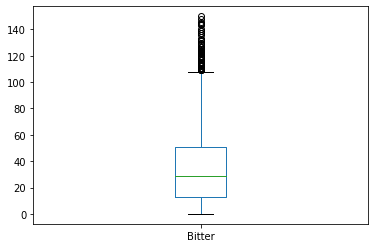

In [19]:
# Bitter
df2.boxplot(column=["Bitter"], grid=False)
stats = boxplot_stats(df2["Bitter"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Bitter"] > whisker_max:
        bitter_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Bitter: " + str(row["Bitter"]))
    if row["Bitter"] < whisker_min:
        bitter_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Bitter: " + str(row["Bitter"]))
for beer in bitter_outliers:
    print(beer)
plt.show()

## Sweet Outlier Analysis

'Olde School Barleywine' from Dogfish Head Craft Brewery - Sweet: 170
'Griffin's BowBoston Beer Company (Samuel Adams)' from Boston Beer Company (Samuel Adams) - Sweet: 146
'Double Or Nothing' from Otter Creek Brewing - Sweet: 238
'Day & Night' from Trillium Brewing Company - Sweet: 154
'Mother Of All Storms' from Pelican Pub & Brewery - Sweet: 156
'Aaron' from Hill Farmstead Brewery - Sweet: 154
'Leon' from Cigar City Brewing - Sweet: 151
'J.W. Lees Harvest Ale (Calvados Cask)J.W. Lees & Co (Brewers) Ltd' from J.W. Lees & Co (Brewers) Ltd - Sweet: 188
'J.W. Lees Harvest Ale (Port Cask)J.W. Lees & Co (Brewers) Ltd' from J.W. Lees & Co (Brewers) Ltd - Sweet: 148
'Irish Walker' from Olde Hickory Brewery - Sweet: 186
'Double Old Thumper Ale' from Shipyard Brewing Company - Sweet: 145
'Jubilee' from Victory Brewing Company - Downingtown - Sweet: 149
'Tucher Bajuvator Doppelbock' from Brauerei Tucher Brau - Sweet: 152
'Dark Heathen Triple Bock' from Kuhnhenn Brewing Company - Sweet: 216
'Do

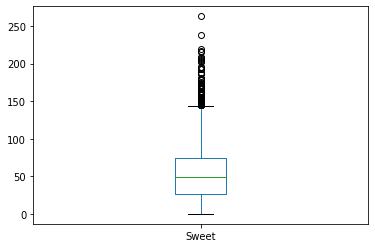

In [20]:
# Sweet
df2.boxplot(column=["Sweet"], grid=False)
stats = boxplot_stats(df2["Sweet"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Sweet"] > whisker_max:
        sweet_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Sweet: " + str(row["Sweet"]))
    if row["Sweet"] < whisker_min:
        sweet_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Sweet: " + str(row["Sweet"]))
for beer in sweet_outliers:
    print(beer)
plt.show()

## Sour Outlier Analysis

'Nelson Sauvignon (Nelson Sauvin Brut)' from Mikkeller ApS - Sour: 119
'Blanc De Blancs' from Side Project Brewing - Sour: 157
'Blond' from Brouwerij Hof Ten Dormaal - Sour: 103
'Thumbprint Imperial Weizen' from New Glarus Brewing Company - Sour: 107
'Schneider Weisse Tap X Aventinus Cuvée Barrique' from Weisses Bräuhaus G. Schneider & Sohn GmbH - Sour: 133
'Slippery Slope' from The People's Pint - Sour: 114
'Sanctification' from Russian River Brewing Company - Sour: 133
'Wild Devil' from Victory Brewing Company - Downingtown - Sour: 133
'Midnight Brett' from Allagash Brewing Company - Sour: 151
'Serenity' from Wicked Weed Brewing - Sour: 112
'Nightmare On Brett' from Crooked Stave Artisan Beer Project - Sour: 163
'The Tide And Its Takers' from Anchorage Brewing Company - Sour: 107
'Femme Fatale Brett' from Evil Twin Brewing - Sour: 143
'Golden Brett' from Allagash Brewing Company - Sour: 178
'Little Brett' from Allagash Brewing Company - Sour: 113
'Femme Fatale Yuzu Pale' from Evil Tw

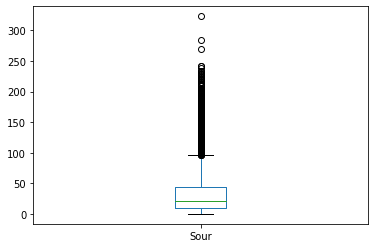

In [21]:
# Sour
df2.boxplot(column=["Sour"], grid=False)
stats = boxplot_stats(df2["Sour"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Sour"] > whisker_max:
        sour_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Sour: " + str(row["Sour"]))
    if row["Sour"] < whisker_min:
        sour_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Sour: " + str(row["Sour"]))
for beer in sour_outliers:
    print(beer)
plt.show()

## Salty Outlier Analysis

'Organic Münster Alt' from Brauerei Pinkus Mueller - Salty: 5
'Gerst Amber' from Yazoo Brewing Company - Salty: 4
'Simple Means' from Jester King Brewery - Salty: 4
'Little Red Cap' from Grimm Brothers Brewhouse - Salty: 4
'Scruffy's Smoked Alt' from Cedar Creek Brewery - Salty: 3
'Helldorado' from Firestone Walker Brewing Co. - Salty: 5
'Day & Night' from Trillium Brewing Company - Salty: 8
'Druid Fluid' from Middle Ages Brewing Co., Ltd. - Salty: 3
'Old Abominable' from Stoudts Brewing Co. - Salty: 6
'Iron Maiden Trooper' from Robinsons Family Brewers - Salty: 5
'Abbot Ale' from Greene King / Morland Brewery - Salty: 3
'Anvil' from AleSmith Brewing Company - Salty: 3
'Ale' from Black Sheep Brewery PLC - Salty: 3
'Moondog Ale' from Great Lakes Brewing Co. - Salty: 3
'Old Golden Hen' from Greene King / Morland Brewery - Salty: 3
'McNellie's Pub Ale' from Marshall Brewing Company - Salty: 3
'Arkell Best Bitter' from Wellington County Brewery - Salty: 4
'Colonel Blides Cask Ale' from Cri

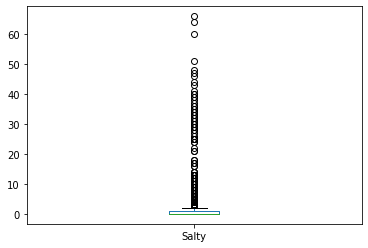

In [22]:
# Salty
df2.boxplot(column=["Salty"], grid=False)
stats = boxplot_stats(df2["Salty"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Salty"] > whisker_max:
        salty_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Salty: " + str(row["Salty"]))
    if row["Salty"] < whisker_min:
        salty_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Salty: " + str(row["Salty"]))
for beer in salty_outliers:
    print(beer)
plt.show()

## Fruits Outlier Analysis

'Eureka W/ Galaxy' from Tree House Brewing Company - Fruits: 153
'Eureka W/ Mosaic' from Tree House Brewing Company - Fruits: 142
'Thumbprint Imperial Weizen' from New Glarus Brewing Company - Fruits: 142
'Femme Fatale Yuzu Pale' from Evil Twin Brewing - Fruits: 207
'Femme Fatale Sudachi' from Evil Twin Brewing - Fruits: 165
'Apricot De Brettaville' from Almanac Beer Co. - Fruits: 153
'St. Bretta Citrus Saison' from Crooked Stave Artisan Beer Project - Fruits: 161
'Brett IPA' from Allagash Brewing Company - Fruits: 152
'Hive 56' from Allagash Brewing Company - Fruits: 149
'Smuttynose Smistletoe' from Smuttynose Brewing Company - Fruits: 149
'Serendipity' from New Glarus Brewing Company - Fruits: 202
'Thumbprint Apple Ale' from New Glarus Brewing Company - Fruits: 152
'Black & Blue' from Dogfish Head Craft Brewery - Fruits: 147
'Strawberry Rhubarb' from New Glarus Brewing Company - Fruits: 162
'Soft Parade' from Short's Brewing Company - Fruits: 154
'Orange Shandy' from Jacob Leinenkuge

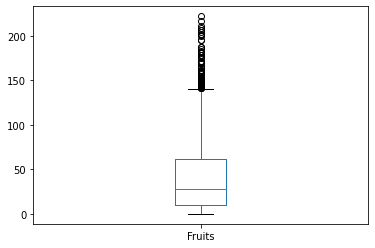

In [23]:
# Fruits
df2.boxplot(column=["Fruits"], grid=False)
stats = boxplot_stats(df2["Fruits"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Fruits"] > whisker_max:
        fruits_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Fruits: " + str(row["Fruits"]))
    if row["Fruits"] < whisker_min:
        fruits_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Fruits: " + str(row["Fruits"]))
for beer in fruits_outliers:
    print(beer)
plt.show()

## Hoppy Outlier Analysis

'Série Signature Sticke Alt' from Les Trois Mousquetaires - Hoppy: 122
'Old Ruffian' from Great Divide Brewing Company - Hoppy: 120
'Belk's ESB' from Anderson Valley Brewing Company - Hoppy: 123
'Motor Boat' from SweetWater Brewing Company - Hoppy: 144
'Beast Bitter' from Middle Ages Brewing Co., Ltd. - Hoppy: 130
'Moondog Ale' from Great Lakes Brewing Co. - Hoppy: 171
'Magnumus Ete Tomahawkus ESB³' from Rock Art Brewery - Hoppy: 134
'The Wise ESB' from Elysian Brewing Company - Hoppy: 140
'Wooly' from Magic Hat Brewing Company - Hoppy: 139
'Red Racer India Style Red AleCentral City Brewers + Distillers' from Central City Brewers + Distillers - Hoppy: 129
'Naughty Hildegard ESB' from Driftwood Brewery - Hoppy: 129
'Adnams Southwold Bitter' from Adnams plc, Sole Bay Brewery - Hoppy: 127
'West Bank Pub Ale' from Minneapolis Town Hall Brewery - Hoppy: 120
'Works Of Love: Earl Grey Tea' from Hill Farmstead Brewery - Hoppy: 136
'Knockout Blonde' from Lawson's Finest Liquids - Hoppy: 148
'He

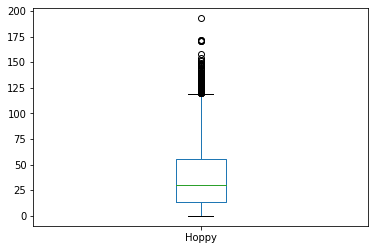

In [24]:
# Hoppy
df2.boxplot(column=["Hoppy"], grid=False)
stats = boxplot_stats(df2["Hoppy"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Hoppy"] > whisker_max:
        hoppy_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Hoppy: " + str(row["Hoppy"]))
    if row["Hoppy"] < whisker_min:
        hoppy_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Hoppy: " + str(row["Hoppy"]))
for beer in hoppy_outliers:
    print(beer)
plt.show()

## Spices Outlier Analysis

'Simple Means' from Jester King Brewery - Spices: 97
'Scruffy's Smoked Alt' from Cedar Creek Brewery - Spices: 130
'J.W. Lees Harvest Ale (Lagavulin Whisky Cask)J.W. Lees & Co (Brewers) Ltd' from J.W. Lees & Co (Brewers) Ltd - Spices: 54
'Mash & Vanilla' from The Bruery - Spices: 72
'Commander' from Lift Bridge Brewery - Spices: 66
'Wooden Hell' from Flossmoor Station Restaurant & Brewery - Spices: 51
'Or Xata' from The Bruery - Spices: 93
'The Vixen Chocolate Chili BockBoston Beer Company (Samuel Adams)' from Boston Beer Company (Samuel Adams) - Spices: 103
'Thumbprint Imperial Weizen' from New Glarus Brewing Company - Spices: 79
'Ramstein Winter Wheat' from High Point Brewing Company - Spices: 53
'Weizenbock' from Pennsylvania Brewing Company - Spices: 56
'Wild Oats Series No. 10 - Dunkel Buck' from Beau's All Natural Brewing Company - Spices: 52
'Volks Weizenbock' from Appalachian Brewing Company - Spices: 57
'Baklava Braggot' from Jackie O's Pub & Brewery - Spices: 73
'Slippery Slo

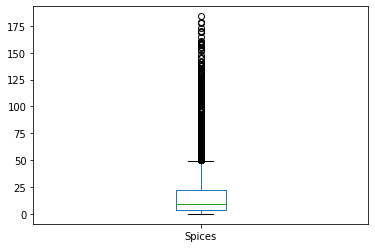

In [25]:
# Spices
df2.boxplot(column=["Spices"], grid=False)
stats = boxplot_stats(df2["Spices"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Spices"] > whisker_max:
        spices_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Spices: " + str(row["Spices"]))
    if row["Spices"] < whisker_min:
        spices_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Spices: " + str(row["Spices"]))
for beer in spices_outliers:
    print(beer)
plt.show()

## Malty Outlier Analysis

'Scurry' from Off Color Brewing - Malty: 218
'Day & Night' from Trillium Brewing Company - Malty: 230
'Saranac Chocolate Lager' from Matt Brewing Company / Saranac Brewery - Malty: 199
'Coffee Bender' from Surly Brewing Company - Malty: 207
'Sumatra Mountain Brown' from Founders Brewing Company - Malty: 218
'Regular Coffee' from Carton Brewing Company - Malty: 208
'BREWtality - Espresso Black Bier' from Midnight Sun Brewing Co. - Malty: 214
'Sweet Baby Jesus!' from DuClaw Brewing Company - Malty: 265
'Samuel Adams Maple Pecan PorterBoston Beer Company (Samuel Adams)' from Boston Beer Company (Samuel Adams) - Malty: 202
'Mørke - Pumpernickel Porter' from Beer Here - Malty: 211
'Entire Butt English Porter' from Salopian Brewing Company Ltd - Malty: 199
'Peanut Butter Cup Porter' from Karl Strauss Brewing Company - Malty: 199
'Bourbon Barrel Black Maple' from Jackie O's Pub & Brewery - Malty: 233
'The Devil Made Me Do It!' from Tyranena Brewing Company - Malty: 215
'Devil Over A Barrel Bo

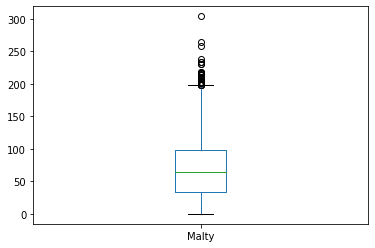

In [26]:
# Malty
df2.boxplot(column=["Malty"], grid=False)
stats = boxplot_stats(df2["Malty"].values)
whisker_max = stats[0]["whishi"]
whisker_min = stats[0]["whislo"]
for row in df.iloc:
    if row["Malty"] > whisker_max:
        malty_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Malty: " + str(row["Malty"]))
    if row["Malty"] < whisker_min:
        malty_outliers.append(
            "'" + row['Name'] + "'" + " from " + row['Brewery'] + " - Malty: " + str(row["Malty"]))
for beer in malty_outliers:
    print(beer)
plt.show()

# **Correlation Analysis**
I attempt to find any correlation between Average Rating and the beer's characteristics. The variation of these
characteristics between beers is what makes up the beer's unique taste profile. It appears there is a slight
correlation between Average Rating and ABV, Min IBU, Max, IBU, Body, Sweet, Sour, and Fruits characteristics.

In [27]:
corr = df["Ave Rating"].corr(df["ABV"])
print("Rating / ABV Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Astringency"])
print("Rating / Astringency Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Min IBU"])
print("Rating / Min IBU Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Max IBU"])
print("Rating / Max IBU Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Body"])
print("Rating / Body Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Alcohol"])
print("Rating / Alcohol Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Bitter"])
print("Rating / Bitter Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Sweet"])
print("Rating / Sweet Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Sour"])
print("Rating / Sour Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Salty"])
print("Rating / Salty Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Fruits"])
print("Rating / Fruits Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Hoppy"])
print("Rating / Hoppy Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Spices"])
print("Rating / Spices Correlation: ", corr)
corr = df["Ave Rating"].corr(df["Malty"])
print("Rating / Malty Correlation: ", corr)

Rating / ABV Correlation:  0.39747129264009384
Rating / Astringency Correlation:  0.12284454111885747
Rating / Min IBU Correlation:  0.31641371572806964
Rating / Max IBU Correlation:  0.3089214750376709
Rating / Body Correlation:  0.30381651785655583
Rating / Alcohol Correlation:  0.206597396084238
Rating / Bitter Correlation:  0.21757302290758526
Rating / Sweet Correlation:  0.2914019761055256
Rating / Sour Correlation:  0.2807136427922287
Rating / Salty Correlation:  0.007892413421216925
Rating / Fruits Correlation:  0.34669784080698346
Rating / Hoppy Correlation:  0.08576863048683009
Rating / Spices Correlation:  0.16368503470906784
Rating / Malty Correlation:  0.16649951534994548


# **Regression**
I run a Random Forest Regression to predict the beer's Average Rating based on its characteristics. This algorithm
analyzes the characteristics of a beer and then predicts the beer's rating with an accuracy of 94.65%.

In [29]:
# Random Forest Regression to Predict Avg Rating
X = df2.iloc[:, df2.columns != 'Ave Rating'].values
Y = df2.iloc[:, 3].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = RandomForestRegressor(n_estimators=1000, random_state=1234)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ap_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(ap_df)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the errors
errors = abs(y_pred - y_test)
percentage_error = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(percentage_error)
print('Accuracy:', round(accuracy, 2), '%.')

      Actual  Predicted
0       3.49    3.51290
1       3.65    3.76610
2       3.87    3.76152
3       3.32    3.59514
4       3.72    3.67823
...      ...        ...
1662    3.57    2.62961
1663    4.03    4.16686
1664    3.78    3.99663
1665    4.17    3.98679
1666    3.52    3.52283

[1667 rows x 2 columns]
Mean Absolute Error: 0.18909217156568653
Mean Squared Error: 0.06363841727372506
Root Mean Squared Error: 0.25226655995935143
Accuracy: 94.65 %.


## **Conclusion**

By using a dataset containing information on 5500+ beers, I have shown correlation between various beer characteristics.
 I have used the data to predict what rating a beer would receive, depending on the beer's characteristics. Outlier
 Analysis was performed on each of the beer's characteristics. Given the characteristics of a beer, I was able to
 successfully predict a beer's rating with an accuracy of 94.6% by using Random Forest Regression.